<a href="https://colab.research.google.com/github/SdSarthak/Rainfall-Prediction/blob/main/Rain_Time_series_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Time series analysis and modeling
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

In [31]:
df= pd.read_csv('/content/usa_rain_prediction_dataset_2024_2025.csv')

In [32]:
df.head()

,Date,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
0,2024-01-01,New York,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278,0
1,2024-01-02,New York,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065,0
2,2024-01-03,New York,80.943050,64.740043,14.184831,0.916884,77.364763,980.796739,1
3,2024-01-04,New York,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163,0
4,2024-01-05,New York,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           73100 non-null  object 
 1   Location       73100 non-null  object 
 2   Temperature    73100 non-null  float64
 3   Humidity       73100 non-null  float64
 4   Wind Speed     73100 non-null  float64
 5   Precipitation  73100 non-null  float64
 6   Cloud Cover    73100 non-null  float64
 7   Pressure       73100 non-null  float64
 8   Rain Tomorrow  73100 non-null  int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 5.0+ MB


In [34]:
df.describe()

,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,65.182270,59.875041,15.017946,0.390635,54.942807,1005.176013,0.220410
std,20.205793,23.066115,8.668729,0.474833,25.982487,20.203889,0.414526
min,30.000766,20.000272,0.000712,0.000000,10.000856,970.000919,0.000000
25%,47.678968,39.800732,7.485182,0.000000,32.318668,987.697646,0.000000
50%,65.294949,59.887840,15.102495,0.196909,55.011121,1005.284188,0.000000
75%,82.636570,79.835990,22.551794,0.673177,77.412469,1022.727410,0.000000
max,99.997393,99.999025,29.999017,3.078090,99.998957,1039.999765,1.000000


In [35]:
df.isnull().sum()

,0
Date,0
Location,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation,0
Cloud Cover,0
Pressure,0
Rain Tomorrow,0


In [36]:
df.fillna(method='ffill', inplace=True)

In [37]:
df.columns

Index(['Date', 'Location', 'Temperature', 'Humidity', 'Wind Speed',
       'Precipitation', 'Cloud Cover', 'Pressure', 'Rain Tomorrow'],
      dtype='object')

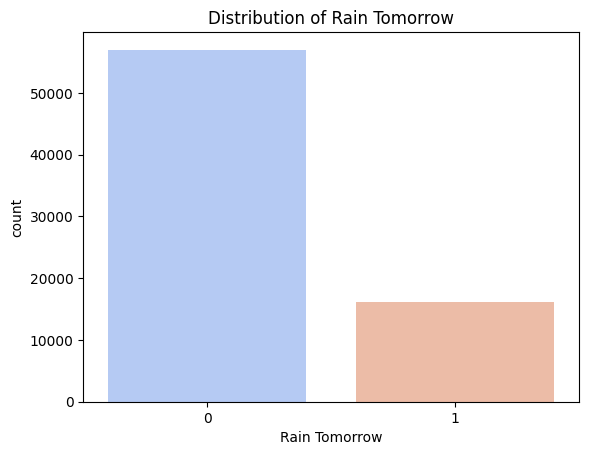

In [38]:
# Plot the distribution of the target variable 'Rain Tomorrow'
sns.countplot(x='Rain Tomorrow', data=df, palette='coolwarm')
plt.title('Distribution of Rain Tomorrow')
plt.show()

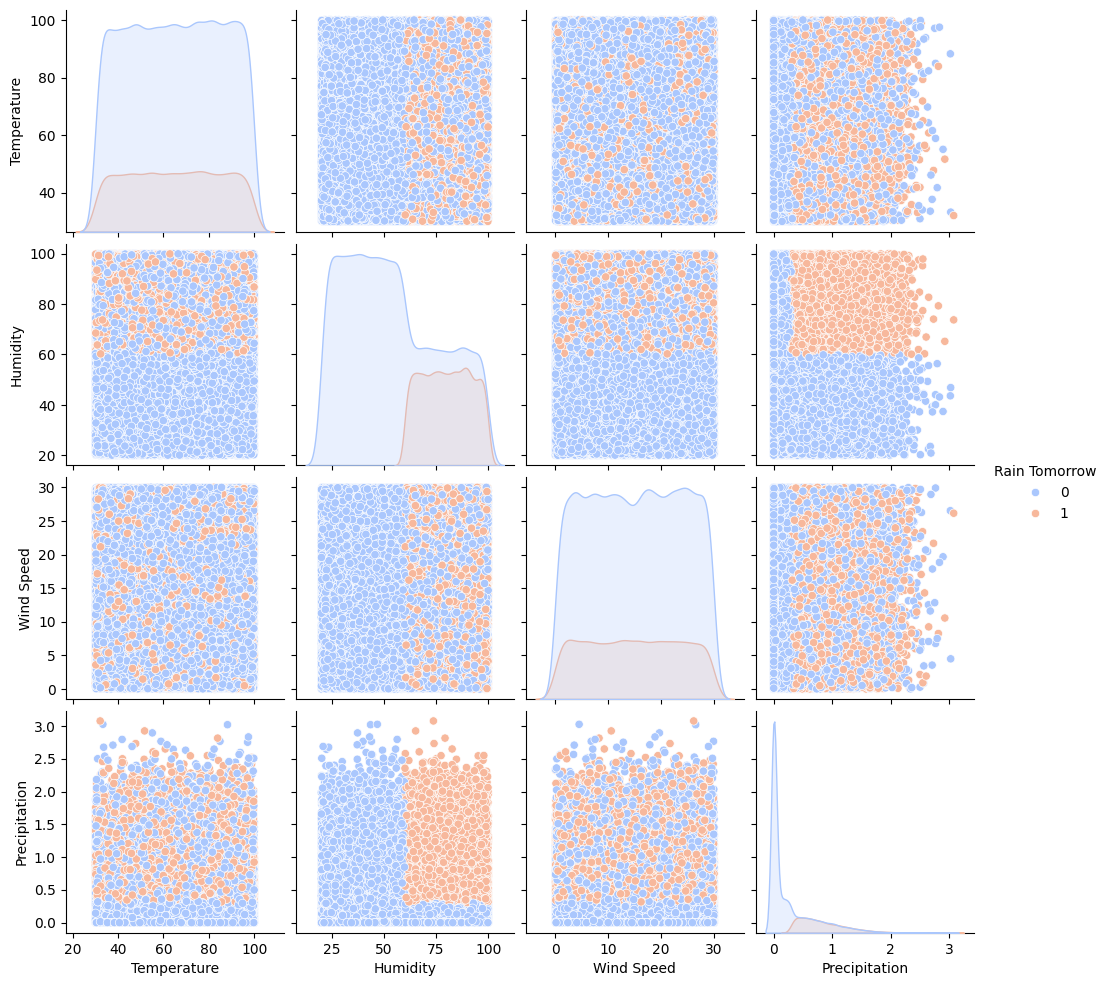

In [39]:
# Pairplot for visualizing relationships between numerical features with correct column names
sns.pairplot(df[['Temperature', 'Humidity', 'Wind Speed', 'Precipitation', 'Rain Tomorrow']], hue='Rain Tomorrow', palette='coolwarm')
plt.show()

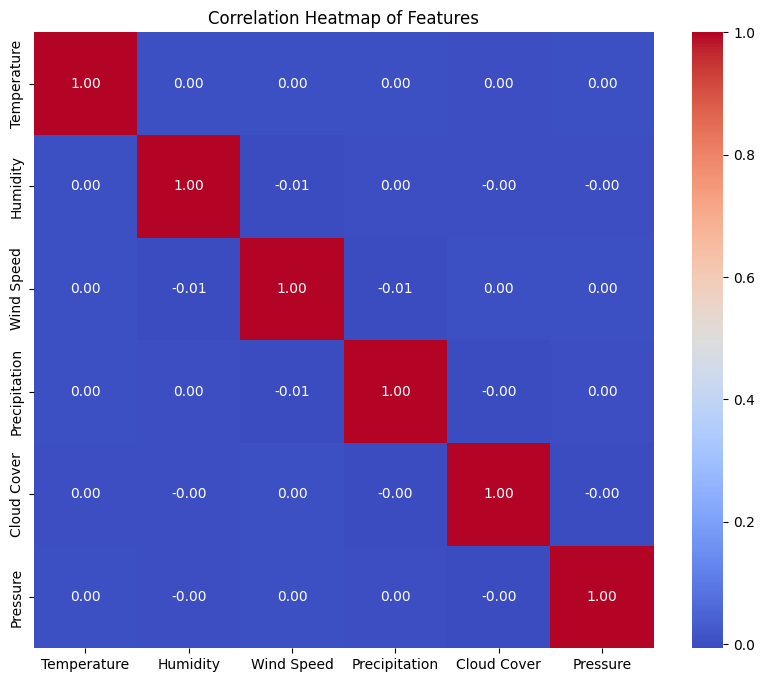

In [40]:
# Exclude non-numeric columns for correlation
numeric_df = df[['Temperature', 'Humidity', 'Wind Speed', 'Precipitation', 'Cloud Cover', 'Pressure']]

# Plot heatmap to visualize correlations between features
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

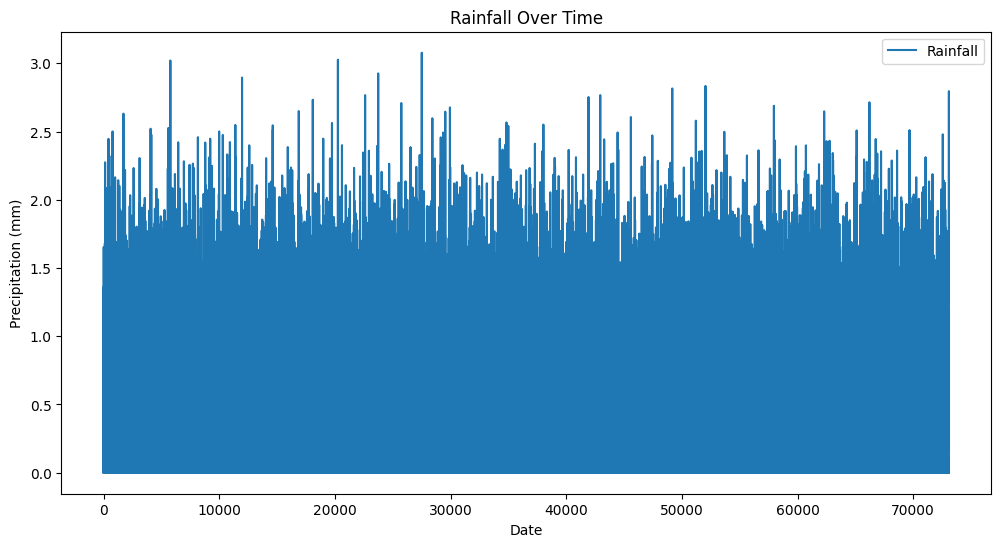

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(df['Precipitation'], label='Rainfall')
plt.title("Rainfall Over Time")
plt.xlabel("Date")
plt.ylabel("Precipitation (mm)")
plt.legend()
plt.show()

In [42]:
# Features and target variable
X = df[['Temperature', 'Humidity', 'Wind Speed', 'Precipitation', 'Cloud Cover', 'Pressure']]
y = df['Rain Tomorrow']

# Create a pipeline with imputer and model
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [43]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('model', RandomForestClassifier(random_state=42))])

Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11369
           1       1.00      1.00      1.00      3251

    accuracy                           1.00     14620
   macro avg       1.00      1.00      1.00     14620
weighted avg       1.00      1.00      1.00     14620



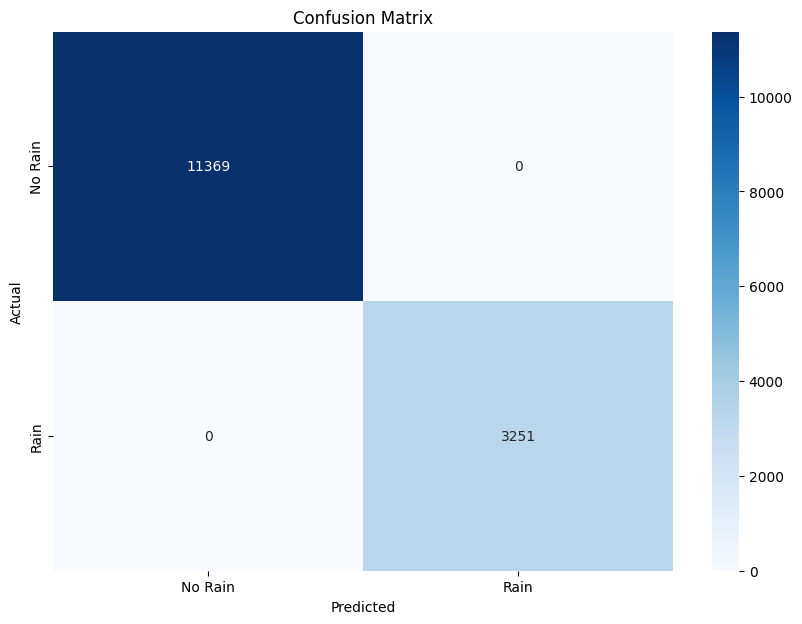

In [44]:
# Predict on test data
y_pred = pipeline.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

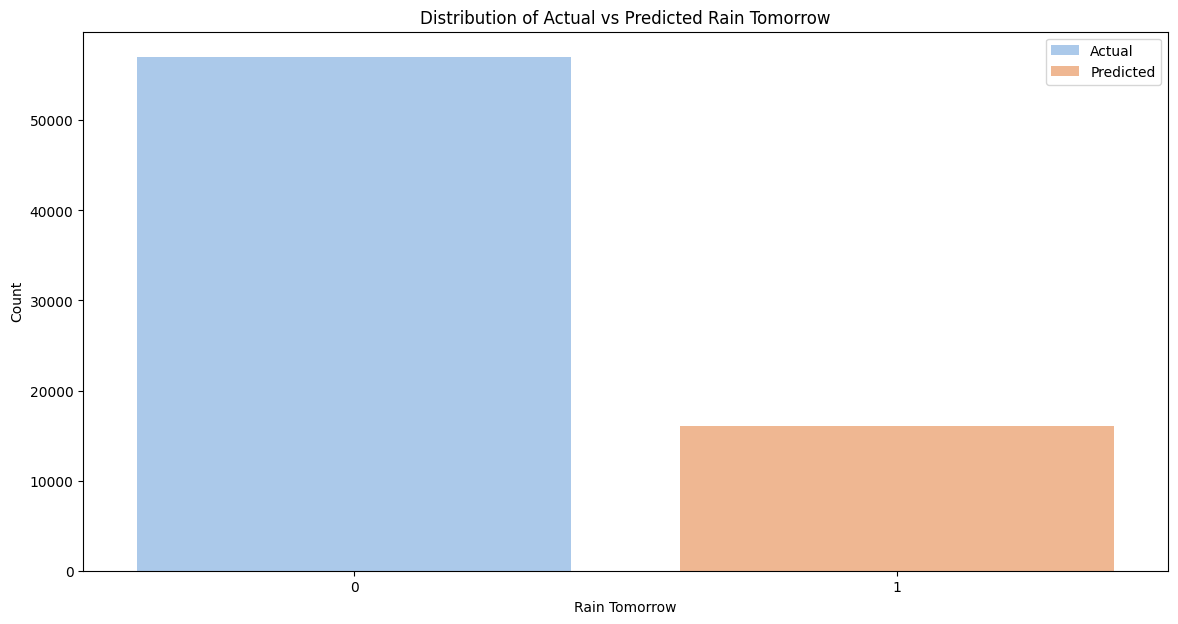

Sample predictions:
          Date  Location  Temperature   Humidity  Wind Speed  Precipitation  \
0  2024-01-01  New York    87.524795  75.655455   28.379506       0.000000   
1  2024-01-02  New York    83.259325  28.712617   12.436433       0.526995   
2  2024-01-03  New York    80.943050  64.740043   14.184831       0.916884   
3  2024-01-04  New York    78.097552  59.738984   19.444029       0.094134   
4  2024-01-05  New York    37.059963  34.766784    3.689661       1.361272   

   Cloud Cover     Pressure  Rain Tomorrow  Predicted Rain Tomorrow  
0    69.617966  1026.030278              0                        0  
1    41.606048   995.962065              0                        0  
2    77.364763   980.796739              1                        1  
3    52.541196   979.012163              0                        0  
4    85.584000  1031.790859              0                        0  


In [45]:
# Make predictions on the entire dataset for final analysis
df['Predicted Rain Tomorrow'] = pipeline.predict(X)

# Plot the distribution of actual vs predicted
plt.figure(figsize=(14, 7))
sns.countplot(x='Rain Tomorrow', data=df, palette='pastel', label='Actual')
sns.countplot(x='Predicted Rain Tomorrow', data=df, palette='pastel', label='Predicted')
plt.title('Distribution of Actual vs Predicted Rain Tomorrow')
plt.xlabel('Rain Tomorrow')
plt.ylabel('Count')
plt.legend(['Actual', 'Predicted'])
plt.show()

# Display a few sample predictions
print("Sample predictions:\n", df[['Date', 'Location', 'Temperature', 'Humidity', 'Wind Speed', 'Precipitation', 'Cloud Cover', 'Pressure', 'Rain Tomorrow', 'Predicted Rain Tomorrow']].head())

In [45]:
numerical_features = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation', 'Cloud Cover', 'Pressure']

# Compute correlation matrix for the numerical features
correlation_matrix = df[numerical_features].corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Add title and labels
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

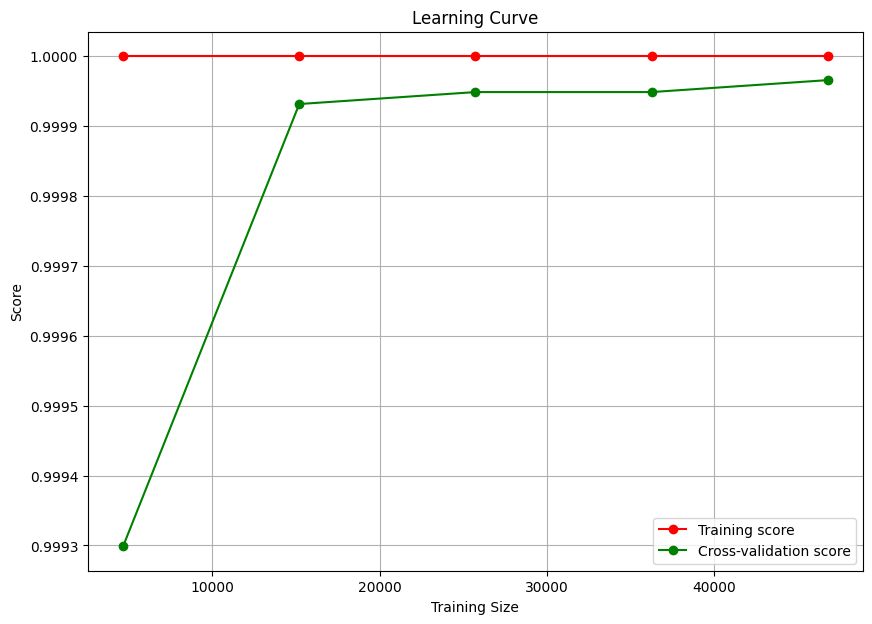

In [46]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Compute learning curve
train_sizes, train_scores, test_scores = learning_curve(pipeline, X_train, y_train, cv=5, scoring='accuracy')

# Plot learning curve
plt.figure(figsize=(10, 7))
plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', color='g', label='Cross-validation score')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()

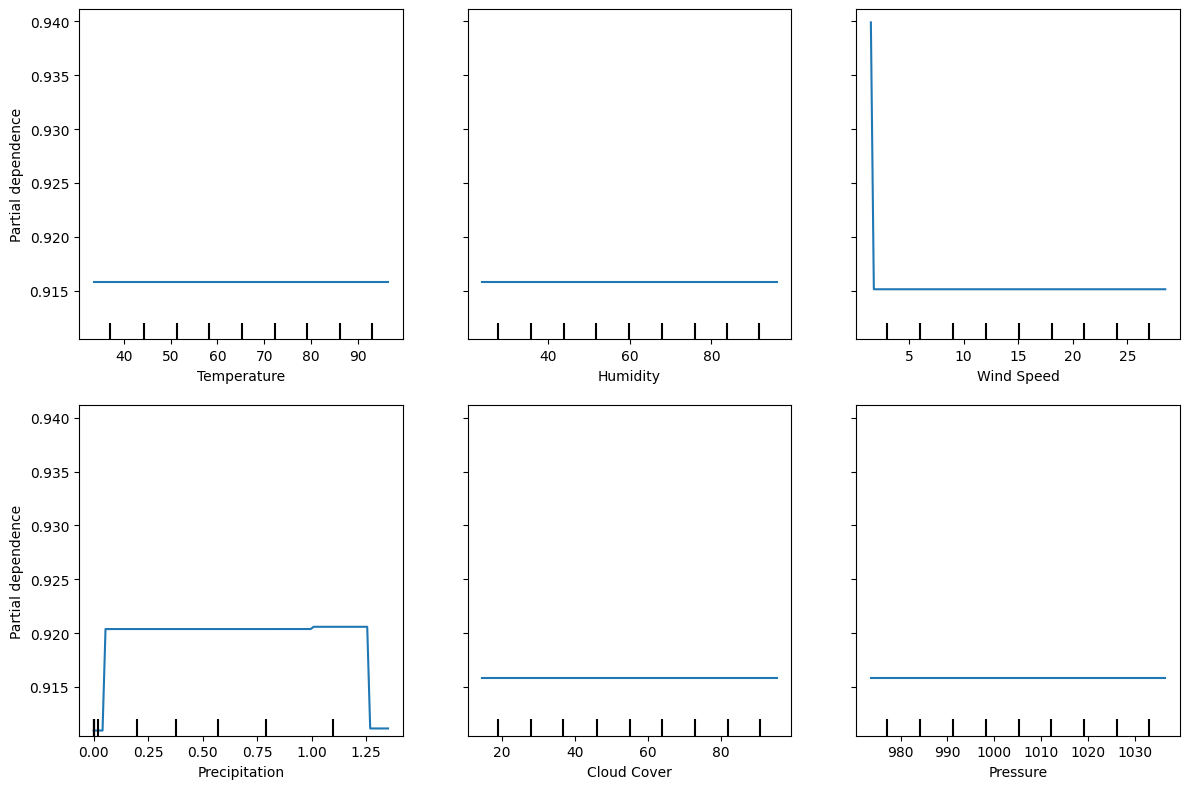

In [47]:
from sklearn.inspection import PartialDependenceDisplay

# Assuming the model pipeline is trained and df is your dataset
features_to_plot = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation', 'Cloud Cover', 'Pressure']

# Partial dependence plot
fig, ax = plt.subplots(figsize=(12, 8))
PartialDependenceDisplay.from_estimator(pipeline.named_steps['model'], df[features_to_plot], features=features_to_plot, ax=ax)

# Show the plot
plt.tight_layout()
plt.show()

AUC Score: 1.00


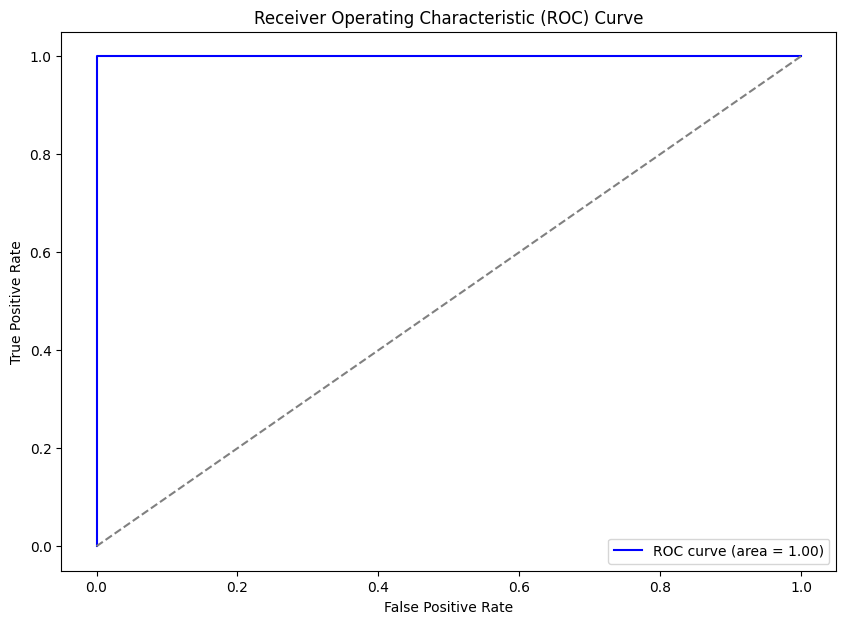

In [48]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities
y_prob = pipeline.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute AUC
auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc_score:.2f}")

# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

Average Precision Score: 1.00


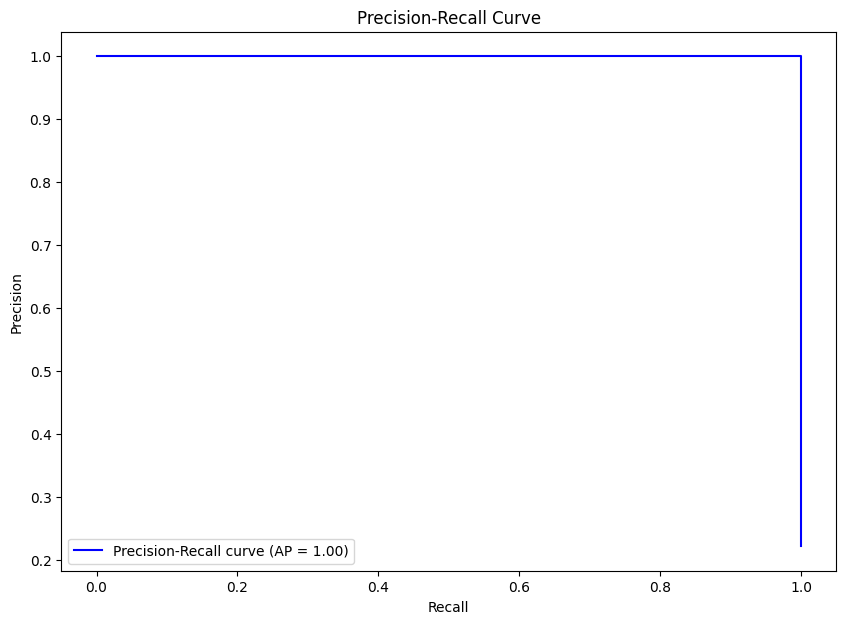

In [49]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Compute Average Precision Score
avg_precision = average_precision_score(y_test, y_prob)
print(f"Average Precision Score: {avg_precision:.2f}")

# Plot Precision-Recall curve
plt.figure(figsize=(10, 7))
plt.plot(recall, precision, color='blue', label='Precision-Recall curve (AP = %0.2f)' % avg_precision)
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()

In [50]:
from sklearn.model_selection import cross_val_score

# Compute cross-validation scores
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score: {:.2f}".format(cv_scores.mean()))
print("Standard Deviation of CV Scores: {:.2f}".format(cv_scores.std()))

Cross-Validation Scores: [1.       0.999829 1.       1.       1.      ]
Mean CV Score: 1.00
Standard Deviation of CV Scores: 0.00


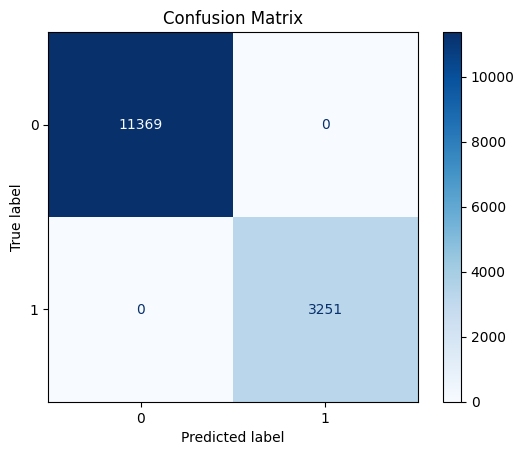

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict class labels
y_pred = pipeline.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

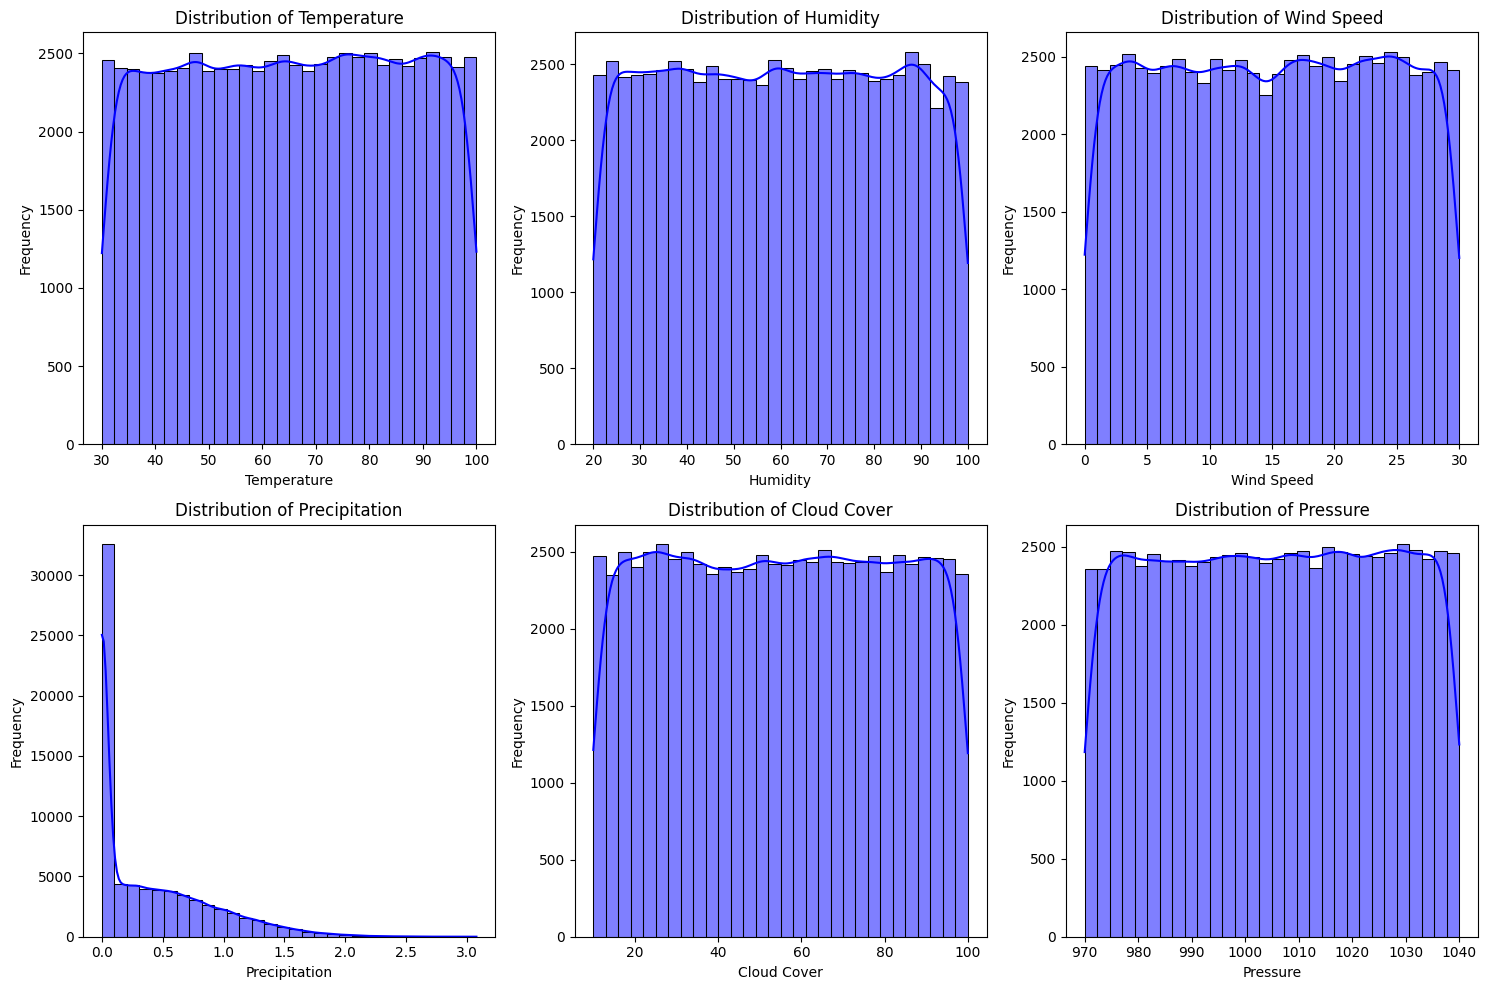

In [52]:
# Define the list of feature columns you want to plot
features = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation', 'Cloud Cover', 'Pressure']

# Plot feature distributions
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

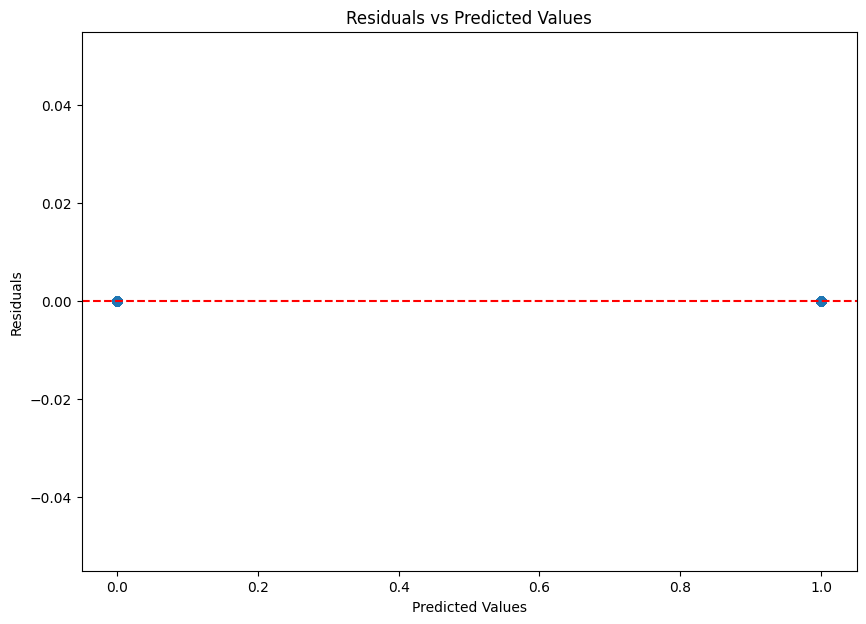

In [53]:
# Predict values
y_pred = pipeline.predict(X_test)

# Compute residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 7))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

 98%|===================| 28673/29240 [00:32<00:00]       

<Figure size 1000x700 with 0 Axes>

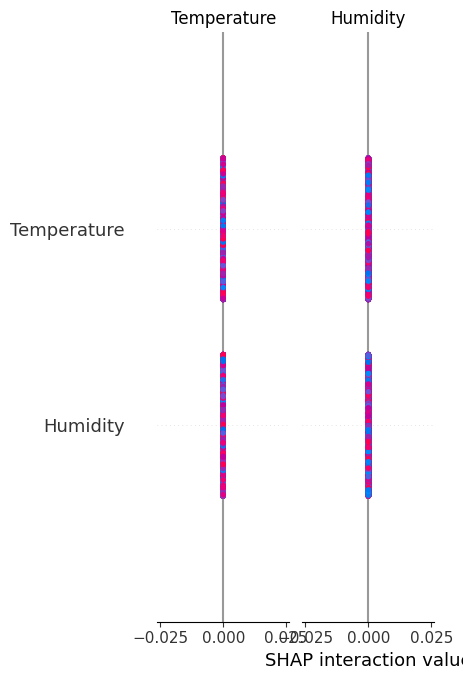

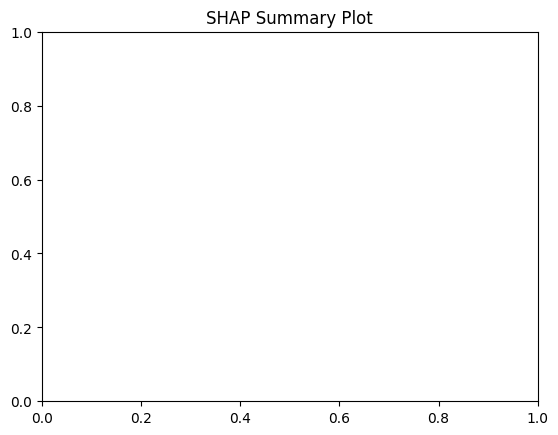

In [54]:
import shap
import matplotlib.pyplot as plt

# Assuming you have already fitted the model on your training data
# Generate SHAP values
explainer = shap.Explainer(pipeline.named_steps['model'], X_train)
shap_values = explainer(X_test)

# Plot SHAP summary
plt.figure(figsize=(10, 7))
shap.summary_plot(shap_values.values, X_test, plot_type="bar")
plt.title('SHAP Summary Plot')
plt.show()

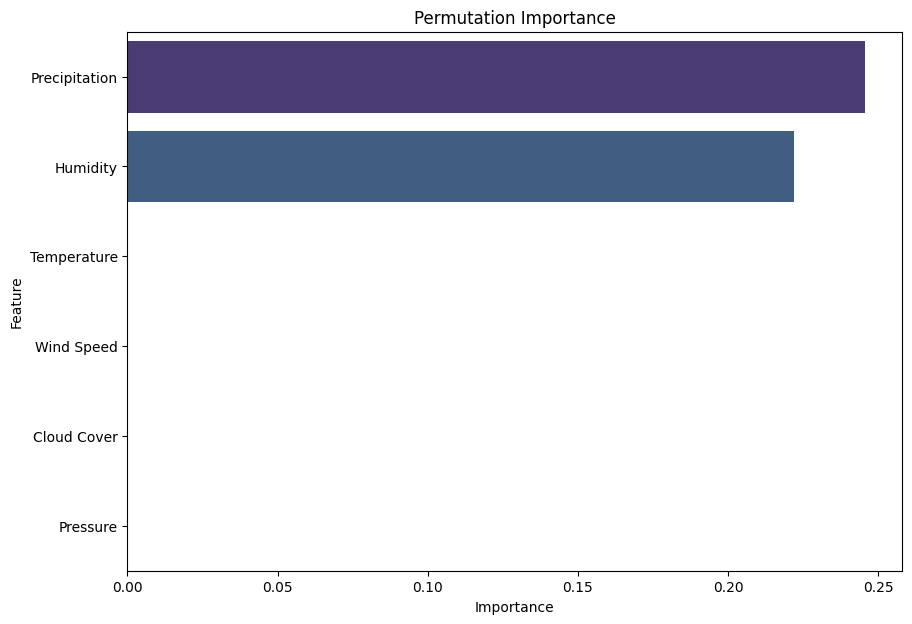

In [55]:
from sklearn.inspection import permutation_importance

# Compute permutation importance
result = permutation_importance(pipeline, X_test, y_test, n_repeats=10, random_state=0, n_jobs=-1)

# Create DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': result.importances_mean
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot permutation importance
plt.figure(figsize=(10, 7))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Permutation Importance')
plt.show()

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier()
}

# Evaluate models
for name, model in models.items():
    pipeline.set_params(model=model)
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name} - Mean CV Score: {scores.mean():.2f}")

Logistic Regression - Mean CV Score: 0.90
Random Forest - Mean CV Score: 1.00
